# IMDB sentiment analysis with scikit-learn

## Fetch data

In [1]:
import tensorflow as tf
import numpy as np
import math 
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd 
import random
from tensorflow.keras.utils import plot_model

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=4000)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

In [2]:
len(word_index)

88584

In [3]:
x_train[0]

"[bos] this film was just brilliant casting location scenery story direction [oov] really suited the part they played and you could just imagine being there robert [oov] is an amazing actor and now the same being director [oov] father came from the same [oov] island as myself so i loved the fact there was a real connection with this film the witty [oov] throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [oov] and would recommend it to everyone to watch and the fly [oov] was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [oov] to the two little [oov] that played the [oov] of norman and paul they were just brilliant children are often left out of the [oov] list i think because the stars that play them all grown up are such a big [oov] for the whole film but these children are amazing and should be [oov] for what they have done 

## Create the vocabulary

In [4]:
from collections import Counter

vocabulary = list()
train_words = list()
sorted_words = list()
for text in x_train:
  tokens = text.split()
  train_words.extend(tokens)

Counter = Counter(train_words)
Counter_copy = Counter
temp = Counter.most_common(3998)
for key in temp:
    sorted_words.append(key[0])

#n=99, m = 1000, k = 2898
k=list()
n=list()
m = Counter.most_common(1100)
j=0
for key in m:
  j+=1
  if(j>=101):
    vocabulary.append(key[0])
 

for i in range(1,100):
  n.append(sorted_words[i])
j=0
for key in sorted_words:
  j+=1
  if(j<=1100):
    sorted_words.remove(key)
k = sorted_words.copy()

print(len(vocabulary))

1000


## Create binary vectors 

In [5]:
from tqdm import tqdm

x_train_binary = list()
x_test_binary = list()

for text in tqdm(x_train):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_train_binary.append(binary_vector)

x_train_binary = np.array(x_train_binary)

for text in tqdm(x_test):
  tokens = text.split()
  binary_vector = list()
  for vocab_token in vocabulary:
    if vocab_token in tokens:
      binary_vector.append(1)
    else:
      binary_vector.append(0)
  x_test_binary.append(binary_vector)

x_test_binary = np.array(x_test_binary)
#print(x_test_binary[0])
y_train_list = y_train.tolist()
print(x_train_binary[0])

vocabulary_indexes = list()
for i in range(len(vocabulary)):
  vocabulary_indexes.append(i)

100%|██████████| 25000/25000 [01:30<00:00, 275.78it/s]


[0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

## Naive Bayes classifier


In [6]:
class Naive_Bayes:

    def __init__(self):
        #lists with the probabilities of having each word given we have a negative or positive review correspondingly 
        self.x1_while_c_is_negative = list()
        self.x1_while_c_is_positive = list()
        #global variables with the probability of having a negative or positive review correspondingly
        self.p_c0 = float(0)
        self.p_c1 = float(0)

    def fit(self, X, Y):
        #Initialisations of elements:
        self.x1_while_c_is_negative = []
        self.x1_while_c_is_positive = []
        reviews = len(Y) 
        neg_reviews = 0 
        pos_reviews = 0
        sum_pos =  list() #For each position i in the array: How many times does the word i appear when we have a positive review
        sum_neg =  list() #For each position i in the array: How many times does the word i appear when we have a negative review
        p_ex_pos = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 1) 
        p_ex_neg = list() #Each element represents for the word Xelement the probability: P( Xelement = 1 | C = 0) 

        #Calculation of the overall probability of having a positive or negative review:
        for i in range(reviews):
            if Y[i] == 0:
                neg_reviews += 1
            else:
                pos_reviews += 1
        self.pc0 = pos_reviews/reviews
        self.pc1 = neg_reviews/reviews

        #Calculation of probabilities for each word given that we have a negative or positive review, respectively:
        

        #Initialization of lists with counters
        for i in range(len(vocabulary)):
            #We already set it to 1 to avoid the absence of any word
            sum_pos.append(0) 
            sum_neg.append(0)

        for i in range(reviews):
            for j in range(len(vocabulary)):
                if(Y[i] == 0 and X[i][j]==1):
                    sum_neg[j] +=1
                elif(Y[i] == 1 and X[i][j]==1):
                    sum_pos[j] +=1
        

        #Lists of probabilities for each word given that we have a negative or positive review
        for i in range(0,1000):
            p_ex_pos.append(0) 
            p_ex_neg.append(0)
        #for i in range(len(p_ex_neg_train)):
        for i in range(len(vocabulary)):
            p_ex_neg[i] = (sum_neg[i]+1)/(neg_reviews+2) #P(Xi = 1 | C = 0) 
        for i in range(len(vocabulary)):
            p_ex_pos[i] = (sum_pos[i]+1)/(pos_reviews+2) #P(Xi = 1 | C = 1)

        p_ex_neg = np.round(p_ex_neg, decimals=2)
        p_ex_pos = np.round(p_ex_pos, decimals=2)

        self.x1_while_c_is_positive = p_ex_pos.copy()
        self.x1_while_c_is_negative = p_ex_neg.copy()

    def predict(self, X):

        # In Naive Bayes classification here we used logarithms to prevent numerical underflow when dealing with probabilities. 
        # The standard Naive Bayes equation is the following: 
        # P(Class∣Features) = P(Features∣Class) * P(Class) / P(Features)
        # The logarithmic transformation simplifies computations:
        # log(P(Class∣Features)) = log(P(Features∣Class)) + log(P(Class)) - log(P(Features))
        # This ensures numerical stability and precision in probabilistic models.


        predictions = list()
        epsilon = 1e-10  #small positive value to avoid errors
        for i in range(len(X)):

            # Initialize log probabilities
            log_pc0 = np.log(self.pc0)
            log_pc1 = np.log(self.pc1)

            # Calculate log probability for negative class (C=0)
            for xi in range(len(X[i])):
                if X[i][xi] == 0:
                    log_pc0 += np.log(1 - self.x1_while_c_is_negative[xi])
                else:
                    log_pc0 += np.log(self.x1_while_c_is_negative[xi] + epsilon)

            # Calculate log probability for positive class (C=1)
            for xi in range(len(X[i])):
                if X[i][xi] == 1:
                    log_pc1 += np.log(self.x1_while_c_is_positive[xi] + epsilon)
                else:
                    log_pc1 += np.log(1 - self.x1_while_c_is_positive[xi])

            if log_pc0 < log_pc1:
                predictions.append(1)
            else:
                predictions.append(0)

        return predictions


In [7]:
tool = Naive_Bayes()
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()
tool.fit(x_train_binary, y_train_list)
y_pred = tool.predict(x_train_binary)
sum=0
for i in range(len(y_train_list)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test) 

# sum = 0
# p1 = tool.x1_while_c_is_negative.copy()
# p2 = tool.x1_while_c_is_positive.copy()
tool2 = Naive_Bayes()
# tool2.fit(x_test_binary, y_test_list)
y_pred = tool.predict(x_test_binary)
sum=0
for i in range(len(y_train_list)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test) 

print(sum)



82.948
82.588
20647


In [8]:
from sklearn.metrics import classification_report
nb = Naive_Bayes()
nb.fit(x_train_binary, y_train)

# Using Naive Bayes Classifier
y = nb.predict(x_test_binary)
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82     12500
           1       0.81      0.85      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 0 ... 1 0 0]
Split training examples :  1
Split training examples :  2
Split training examples :  3
Split training examples :  4


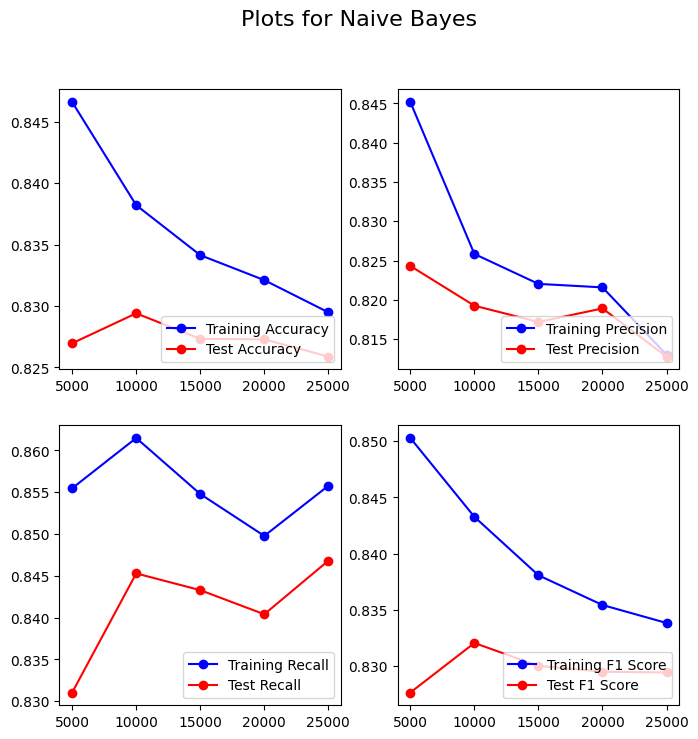

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,0.846600,0.82696,0.845169,0.824314,0.855460,0.83104,0.850283,0.827663
1,0.838200,0.82940,0.825839,0.819260,0.861468,0.84528,0.843278,0.832067
2,0.834133,0.82732,0.822035,0.817195,0.854772,0.84328,0.838084,0.830033
3,0.832100,0.82728,0.821590,0.818912,0.849766,0.84040,0.835441,0.829517
4,0.829480,0.82588,0.813027,0.812793,0.855760,0.84680,0.833847,0.829448


In [9]:
# Define a function to evaluate and plot the performance of a machine learning estimator.
def custom_curve(estimator, training_features, training_labels, test_features, test_labels, num_splits, plot_title):
  
  # Calculate the size of each training data split.
  size_per_split = int(len(training_features) / num_splits)
  
  # Split the training data and labels into num_splits equal parts.
  feature_splits = np.split(training_features, num_splits)
  label_splits = np.split(training_labels, num_splits)

  # Initialize lists to store various performance metrics.
  training_accuracy, test_accuracy = list(), list()
  training_precision, test_precision = list(), list()
  training_recall, test_recall = list(), list()
  training_f1_score, test_f1_score = list(), list()

  # Create a 2x2 grid of subplots for plotting the metrics.
  figure, ((accuracy_ax, precision_ax), (recall_ax, f1_score_ax)) = plt.subplots(2, 2, figsize=(8, 8), dpi=100, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
  figure.suptitle("Plots for {title}".format(title=plot_title), fontsize=16)

  # Use the first split as the initial training set.
  current_features = feature_splits[0]
  current_labels = label_splits[0]
  
  # Print the current training data for debugging.
  print(current_features, current_labels)
  
  # Fit the estimator using the current training set.
  estimator.fit(current_features, current_labels)

  # Make predictions on the current training set and the entire test set.
  training_predictions = estimator.predict(current_features)
  test_predictions = estimator.predict(test_features)

  # Calculate and append accuracy for the training and test sets.
  training_accuracy.append(accuracy_score(current_labels, training_predictions))
  test_accuracy.append(accuracy_score(test_labels, test_predictions))

  # Calculate and append precision for the training and test sets.
  training_precision.append(precision_score(current_labels, training_predictions))
  test_precision.append(precision_score(test_labels, test_predictions))

  # Calculate and append recall for the training and test sets.
  training_recall.append(recall_score(current_labels, training_predictions))
  test_recall.append(recall_score(test_labels, test_predictions))

  # Calculate and append F1 score for the training and test sets.
  training_f1_score.append(f1_score(current_labels, training_predictions))
  test_f1_score.append(f1_score(test_labels, test_predictions))

  # Iteratively train the model with more data and track performance.
  for i in range(1, len(feature_splits)):
    # Print the current number of training examples being used.
    print("Split training examples : ", i)
    
    # Incrementally add more data to the training set.
    current_features = np.concatenate((current_features, feature_splits[i]), axis=0)
    current_labels = np.concatenate((current_labels, label_splits[i]), axis=0)
    
    # Re-fit the estimator with the expanded training set.
    estimator.fit(current_features, current_labels)

    # Make new predictions with the updated model.
    training_predictions = estimator.predict(current_features)
    test_predictions = estimator.predict(test_features)

    # Update the performance metrics with the new predictions.
    training_accuracy.append(accuracy_score(current_labels, training_predictions))
    test_accuracy.append(accuracy_score(test_labels, test_predictions))
    training_precision.append(precision_score(current_labels, training_predictions))
    test_precision.append(precision_score(test_labels, test_predictions))
    training_recall.append(recall_score(current_labels, training_predictions))
    test_recall.append(recall_score(test_labels, test_predictions))
    training_f1_score.append(f1_score(current_labels, training_predictions))
    test_f1_score.append(f1_score(test_labels, test_predictions))
    
  # Prepare the x-axis for the plots (training size).
  training_sizes = list(range(size_per_split, len(training_features) + size_per_split, size_per_split))

  # Plot training and test accuracy.
  accuracy_ax.plot(training_sizes, training_accuracy, 'o-', color="b", label='Training Accuracy')
  accuracy_ax.plot(training_sizes, test_accuracy, 'o-', color="red", label='Test Accuracy')
  accuracy_ax.legend(loc="lower right")
  
  # Plot training and test precision.
  precision_ax.plot(training_sizes, training_precision, 'o-', color="b", label='Training Precision')
  precision_ax.plot(training_sizes, test_precision, 'o-', color="red", label='Test Precision')
  precision_ax.legend(loc="lower right")

  # Plot training and test recall.
  recall_ax.plot(training_sizes, training_recall, 'o-', color="b", label='Training Recall')
  recall_ax.plot(training_sizes, test_recall, 'o-', color="red", label='Test Recall')
  recall_ax.legend(loc="lower right")

  # Plot training and test F1 scores.
  f1_score_ax.plot(training_sizes, training_f1_score, 'o-', color="b", label='Training F1 Score')
  f1_score_ax.plot(training_sizes, test_f1_score, 'o-', color="red", label='Test F1 Score')
  f1_score_ax.legend(loc="lower right")
    
  # Display the plots.
  plt.show()

  # Compile and return the performance data.
  performance_data = {
    'Training Accuracy': training_accuracy,
    'Test Accuracy': test_accuracy,
    'Training Precision': training_precision,
    'Test Precision': test_precision,
    'Training Recall': training_recall,
    'Test Recall': test_recall,
    'Training F1 Score': training_f1_score,
    'Test F1 Score': test_f1_score
  }

  
  df = pd.DataFrame(performance_data)

  return df

tool = Naive_Bayes()
tool.fit(x_train_binary, y_train_list)
custom_curve(tool, x_train_binary, y_train, x_test_binary, y_test, 5, "Naive Bayes")

## ID3 Classifier

In [10]:
#The formula for calculating the entropy is:
#H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
#And it is used in the calculation of the Information Gain as follows:
#IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
#Which, if we want to alanlyze more, becomes:
#IG(Y,Xi)= H(C) - 
#         (P(X=1)*( -(P(C=1|X=1)*log2(P(C=1|X=1))) - (P(C=0|X=1)*log2(P(C=0|X=1))) +
#		   P(X=0)*( -(P(C=1|X=0)*log2(P(C=1|X=0))) - (P(C=0|X=0)*log2(P(C=0|X=0))))

def IG(Y, Xi):

    #Part A: Calculating the H(C) = -P(C=0)*log2(P(C=0)) -P(C=1)*log2(P(C=1))
    Hc = 0
    for c in range(2):
        pc = list(Y).count(c)/len(Y) #P(C=Ci) = (Number of Ci)/(All C instances)
        Hc += - pc * math.log(pc, 2)

    #Part B: Calculating the IG(Y,Xi)= H(C) - P(Xi = 1)*H(C|Xi=1) + P(Xi = 0)*H(C|Xi=0)
    #this will happen in two repetitions: one for Xi=0 and one for Xi=1
    Hc_second = 0
    for feature in range(2):
        p = list(Xi).count(feature)/len(Xi) #P(X = i) = (Number of Xi=feat)/(All features of Xi)
        
        #finding the number of Y instances for which X=Xi, which will be used for calculating the P(C=c|X=x)
        Ys = list()  
        for i in range(len(Xi)):
            if Xi[i] == feature:
                Ys.append(Y[i])

        #Calculating the H(C=c|X=x) = ( -(P(C=1|X=x)*log2(P(C=1|X=x))) - (P(C=0|X=x)*log2(P(C=0|X=x))) (for x in [0,1])
        for c in range(2):
            if len(Ys)!=0:
                pc_while_x = Ys.count(c)/len(Ys) #P(C=c|X=x) = (Instances of C for which C=c and X=x)/(All instances of C for which X=x)
                if pc_while_x != 0:
                    H = - p * pc_while_x * math.log(pc_while_x, 2)
                    Hc_second += H
    ig = Hc - Hc_second
    return ig    


class Tree():
    def __init__(self):
        self.word = "no word yet" #The word used for the classification of a subtree
        self.tag = None #1 if the node has reviews with the word used for classification, 0 if they do not have it.
        self.children = list() #Children of a node
        self.classification = int #The final classification. Takes a value only if the classification has been executed.
    
    def new_child(self, node):
        self.children.append(node)

class ID3():
    def __init__(self, max_depth = 10):
        self.max_depth = max_depth
        self.depth = 0

    def most_IG(self, X, Y, vocabulary):

        max_gain = -1
        max_word= -1


        for w in vocabulary:
            x_word = list() #List of all the values that a word will take in variable X
            for ex in range(len(X)):
                x_word.append(X[ex][w])
            word_ig = IG(Y, x_word) #We send Y and the list to IG to find the information gain of the word relative to Y.

            if(word_ig>max_gain):
                max_gain = word_ig
                max_word = w

        return max_word #The word with the maximum Information Gain

    def fit(self, X, Y, vocabulary, default):
       
        if(len(Y) == 0):
            #If we have reached this point, the Y values are finished because the classification of each review in the tree is complete.
            #The value of the classification becomes the one that prevailed at the above level of the tree.
            node = Tree()
            node.classification = default 
            return node 

        if(len(set(Y)) == 1):
            # The set method returns a set with all the different values contained in its argument, here Y.
            # So, if we have reached this point and Y has only one value, which will be used in the classification, the process stops. 
            node = Tree()
            node.classification = Y[0]
            return node

        if(len(vocabulary) == 0):
            # If we have reached this point, we have used all the words, so no further classifications are made.
            # The process stops, and it is classified with the value that prevails in Y.
            node = Tree()
            if(Y.count(0)>Y.count(1)):
                max_count = 0
            else:
                max_count = 1
            node.classification = max_count
            return node

        if (self.depth == self.max_depth):
            # If we are here, we have reached the max depth of the tree.
            # The process stops, and it is classified with the value that prevails in Y.
            # If there is a tie between negative and positive reviews, we take the default, which is the one that prevailed at the above level.
            node = Tree()
            if((Y.count(0))>Y.count(1)):
                node.classification = 0
            elif((Y.count(0))<Y.count(1)):
                node.classification = 1
            else:
                node.classification =default
            return node

        #The process stops if either 0 or 1 prevails in the remaining reviews.
        if (float(Y.count(1))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 1                   
            return node
        
        if(float(Y.count(0))/float(len(Y))>= 0.75):
            node = Tree()
            node.classification = 0
            return node

        #Save the prevailing classification so far to be passed as the default in the subsequent levels.
        if(Y.count(1)>Y.count(0)):
            max_count = 1
        else:
            max_count = 0


        best_word = self.most_IG(X, Y, vocabulary) #Finding the word with the highest Information Gain 
        tree = Tree() #Initialization of the tree

        #The new vocabulary, excluding the word that will be used for the split into leaves, so that it is not reused afterward.
        new_vocabulary = vocabulary.copy() 
        new_vocabulary.remove(best_word)
        self.depth += 1 #updating the depth

        for zero_or_one in range(2):
            #The new lists of reviews, because of the for two lists are created for each category (Y and X), one with the best_word and one without
            x_new = list()
            y_new = list()
            for i in range(len(X)):
                if X[i][best_word] == zero_or_one:
                    x_new.append(X[i])
                    y_new.append(Y[i])
            subtree = self.fit(x_new, y_new, new_vocabulary, max_count)
            subtree.tag = zero_or_one 
            subtree.word = best_word
            tree.new_child(subtree)            
                
        return tree

    def singular_prediction(self, X, tree):
        sub_tree = tree #Initialization of subtree
        flag = False
        while not flag:
            word_feature = sub_tree.children[0].word #We take the word with which the division happens
            for sub in sub_tree.children:
                if (sub.tag == X[word_feature]): 
                    #If the word-criterion, with which the division happened on this level, exists
                    # we move to the subtree in which the tag is 1 (which means it has reviews that include that word), 
                    # or else we move to the subtree in which the tag is 0
                    sub_tree = sub
            if(sub_tree.classification == 1 or sub_tree.classification == 0):
                # We stop when we reach a leaf. Leaves have the value 0 or 1 and that value ends up to become the sample's classification
                # All others intermediate nodes have None as the classification value.
                flag = True
        return sub_tree.classification

    def predict(self, tree, X):
        y_pred = list()
        for i in range(len(X)):
            y_pred.append(self.singular_prediction(X[i], tree)) #prediction for each review separately
        
        return y_pred

In [10]:
model = ID3(400)
y_train_list = y_train.tolist()
y_test_list = y_test.tolist()
trained_tree = model.fit(x_train_binary, y_train_list, vocabulary_indexes, 0)

y_pred = model.predict(trained_tree, x_train_binary)
sum=0
for i in range(len(y_test)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

#trained_tree = model.fit(x_test_binary, y_test_list, vocabulary_indexes, 0)
y_pred = model.predict(trained_tree, x_test_binary)
y_test_list = y_test.tolist()
sum=0
for i in range(len(y_test)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

81.708
74.79599999999999


## Random Forest classifier

In [11]:
import random

class Random_Forest():
    def __init__(self, num_of_words, trees = 10):
        self.num_of_words = num_of_words #Αριθμός των λέξεων Number of words
        self.trees = trees #Numbers of trees to be created
        self.forest = list() #List of trees

    def new_sample(self, X, Y):
        # Initialization of the new x and y
        x_new = list()
        y_new = list()

        y_indexes = list() #Indexes of reviews that haven't be selected yet
        for i in range(len(Y)):
            y_indexes.append(i)

        for i in range(len(X)):
            #Random selection of reviews for the subset that the method will return, using the indexes that have been created above
            random_choice = random.choice(y_indexes) 
            x_new.append(X[random_choice])
            y_new.append(Y[random_choice])

        return x_new, y_new

    def new_vocabulary(self, X):
        # List with the indexes of the vocabulary for the random selection of new words for the new vocabulary that this method will return
        words_indexes = list()
        for x in range(len(X[0])):
            words_indexes.append(x)

        new_words = list()
        for i in range(self.num_of_words):
            random_word = random.choice(words_indexes) #Random selection of word
            words_indexes.remove(random_word) #Subtrackting the word from the old vocabulary 
            new_words.append(random_word) #Insertimg the word in the new vocabulary

        return new_words

    def fit(self, X, Y, max_depth = 10):
        for i in range(self.trees):
            id3 = ID3(max_depth) #Creating the ID3 tree
            random_x, random_y = self.new_sample(X, Y)
            tree = id3.fit(random_x, random_y, self.new_vocabulary(random_x), 0)
            self.forest.append(tree)

    def predict(self, X):
        y_pred = list()
        for i in range(len(X)):
            zeros =0
            ones = 0
            for j in range(self.trees):
                id3 = ID3()
                prediction = id3.singular_prediction(X[i], self.forest[j])
                if (prediction == 1):
                    ones += 1
                elif(prediction==0):
                    zeros +=1
            if ones>zeros:
                y_pred.append(1)
            else:
                y_pred.append(0)
        return y_pred

In [16]:

model = Random_Forest(400,8) #the combination that gives the best results
trained_forest = model.fit(x_train_binary, y_train_list)
y_pred = model.predict(x_train_binary)
y_train_list = y_train.tolist()
sum=0
for i in range(len(y_train)):
    if(y_train_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_train_list))*100
print(correct_percentage_test)

y_pred = model.predict(x_test_binary)
y_test_list = y_test.tolist()
sum=0
for i in range(len(y_test)):
    if(y_test_list[i]==y_pred[i]):
        sum+=1
correct_percentage_test = (sum/len(y_test_list))*100
print(correct_percentage_test)

72.38
72.124


[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [1 0 0 ... 1 0 0]
Split training examples :  1
Split training examples :  2
Split training examples :  3
Split training examples :  4


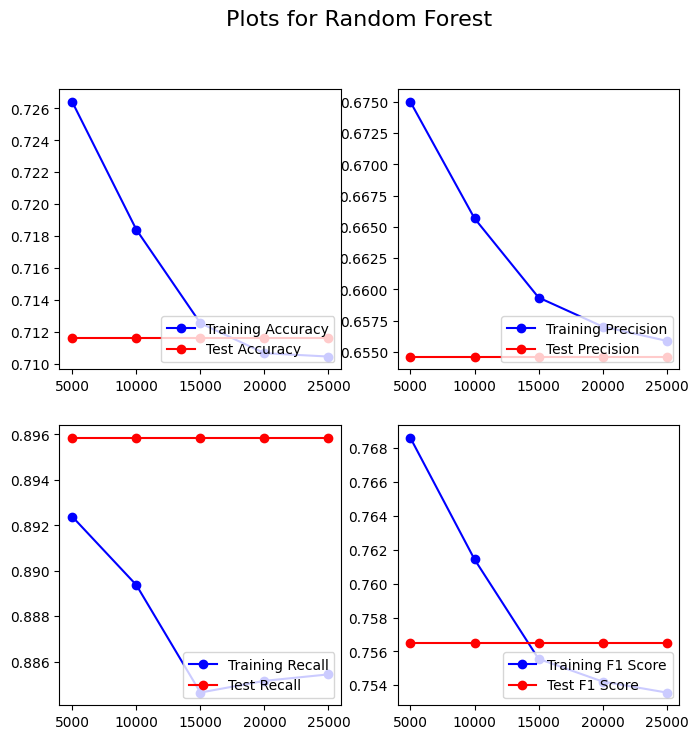

,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,0.726400,0.7116,0.674985,0.654624,0.892380,0.89584,0.768606,0.756468
1,0.718400,0.7116,0.665679,0.654624,0.889373,0.89584,0.761437,0.756468
2,0.712533,0.7116,0.659345,0.654624,0.884641,0.89584,0.755556,0.756468
3,0.710650,0.7116,0.657022,0.654624,0.885156,0.89584,0.754215,0.756468
4,0.710440,0.7116,0.655881,0.654624,0.885440,0.89584,0.753566,0.756468


In [17]:
tool = Random_Forest(400,8)
custom_curve(tool, x_train_binary, y_train, x_test_binary, y_test, 5, "Random Forest")

In [12]:
tool = Random_Forest(400,8)
trained_forest = tool.fit(x_train_binary, y_train_list)
# Using Naive Bayes Classifier
y = tool.predict(x_train_binary)
print(classification_report(y_train, y))

y = tool.predict(x_test_binary)
print(classification_report(y_test, y))

              precision    recall  f1-score   support

           0       0.85      0.54      0.66     12500
           1       0.66      0.90      0.77     12500

    accuracy                           0.72     25000
   macro avg       0.76      0.72      0.71     25000
weighted avg       0.76      0.72      0.71     25000

              precision    recall  f1-score   support

           0       0.85      0.53      0.66     12500
           1       0.66      0.91      0.76     12500

    accuracy                           0.72     25000
   macro avg       0.76      0.72      0.71     25000
weighted avg       0.76      0.72      0.71     25000

